## MOVIE REVIEW - NLP

#### File Name: Shruti Gupta - Capstone Project
#### Author: Shruti Gupta
#### Date: 09/06/2019

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Phase 1 Cleaning (Score 30 + 10 Extra credits):

    Each student must solve

        1. Read the labelled data from respective folders (pos & neg) and store in data-frames (eg: train_df & test_df) with suitable structure
            Hint: columns = [review, label]
        2. Remove stop words from the data
        3. Removing punctuations, HTML tags (like br) etc.
        4. Apply Stemming and Lemmatization
     
     Extra Credits

        1.Apply feature selection to select most important words/features and drop others (Bonus)

In [2]:
# loading the data into the 2 data frames: train and test
import os
import glob

train_data_pos=[]
train_data_neg=[]
test_data_pos=[]
test_data_neg=[]

#dirctory path for the positive reviews
pos_train_path = 'C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\data scienece using python\\week 16 - 17 - 18 - Capstone\\aclImdb\\train\\pos'
pos_test_path = 'C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\data scienece using python\\week 16 - 17 - 18 - Capstone\\aclImdb\\test\\pos'

#dirctory path for the positive reviews
neg_train_path = 'C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\data scienece using python\\week 16 - 17 - 18 - Capstone\\aclImdb\\train\\neg'
neg_test_path = 'C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\data scienece using python\\week 16 - 17 - 18 - Capstone\\aclImdb\\test\\neg'

#retriving the data
pos_train_file = glob.glob(os.path.join(pos_train_path,'*.txt'))

for f in pos_train_file:
    with open(f,'r',encoding = 'utf-8') as pos_train:
        train_data_pos.append(pos_train.read())

#neg train
neg_train_file = glob.glob(os.path.join(neg_train_path,'*.txt'))

for f in neg_train_file:
    with open(f,'r',encoding = 'utf-8') as neg_train:
        train_data_neg.append(neg_train.read())

#pos test
pos_test_file = glob.glob(os.path.join(pos_test_path,'*.txt'))

for f in pos_test_file:
    with open(f,'r',encoding = 'utf-8') as pos_test:
        test_data_pos.append(pos_test.read())

#neg test
neg_test_file = glob.glob(os.path.join(neg_test_path,'*.txt'))

for f in neg_test_file:
    with open(f,'r',encoding = 'utf-8') as neg_test:
        test_data_neg.append(neg_test.read())

In [3]:
#loading the data
df_train=pd.DataFrame(train_data_pos,columns=['reviews'])
df_train['labels']=1
df_train1=pd.DataFrame(train_data_neg,columns=['reviews'])
df_train1['labels']=0
df_test=pd.DataFrame(test_data_pos,columns=['reviews'])
df_test['labels']=1
df_test1=pd.DataFrame(test_data_neg,columns=['reviews'])
df_test1['labels']=0

In [4]:
df_train.head()

reviews  labels
0  Bromwell High is a cartoon comedy. It ran at t...       1
1  Homelessness (or Houselessness as George Carli...       1
2  Brilliant over-acting by Lesley Ann Warren. Be...       1
3  This is easily the most underrated film inn th...       1
4  This is not the typical Mel Brooks film. It wa...       1

In [5]:
df_train1.head()

reviews  labels
0  Story of a man who has unnatural feelings for ...       0
1  Airport '77 starts as a brand new luxury 747 p...       0
2  This film lacked something I couldn't put my f...       0
3  Sorry everyone,,, I know this is supposed to b...       0
4  When I was little my parents took me along to ...       0

In [6]:
df_test.head()

reviews  labels
0  I went and saw this movie last night after bei...       1
1  Actor turned director Bill Paxton follows up h...       1
2  As a recreational golfer with some knowledge o...       1
3  I saw this film in a sneak preview, and it is ...       1
4  Bill Paxton has taken the true story of the 19...       1

In [7]:
df_test1.head()

reviews  labels
0  Once again Mr. Costner has dragged out a movie...       0
1  This is an example of why the majority of acti...       0
2  First of all I hate those moronic rappers, who...       0
3  Not even the Beatles could write songs everyon...       0
4  Brass pictures (movies is not a fitting word f...       0

In [8]:
df_train=df_train.append(df_train1)
df_test=df_test.append(df_test1)

In [9]:
df_train.shape

(25000, 2)

In [10]:
df_test.shape

(25000, 2)

In [11]:
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')

In [12]:
#reading from csv file
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [13]:
df_train.shape, df_test.shape

((25000, 3), (25000, 3))

In [14]:
df_train.columns,df_test.columns

(Index(['Unnamed: 0', 'reviews', 'labels'], dtype='object'),
 Index(['Unnamed: 0', 'reviews', 'labels'], dtype='object'))

In [15]:
df_train=df_train.drop('Unnamed: 0',axis=1)
df_test=df_test.drop('Unnamed: 0',axis=1)

In [16]:
df_train.columns,df_test.columns

(Index(['reviews', 'labels'], dtype='object'),
 Index(['reviews', 'labels'], dtype='object'))

In [17]:
#removing stopwords, punctuations
import string
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [18]:
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [19]:
# Function to remove Stopwords
ps = nltk.PorterStemmer()
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.sub(r"<.*>"," ",text)
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [20]:
#stemming and lemmatization
#ps = nltk.PorterStemmer()

#def stemming(tokenized_text):
 #   text = [ps.stem(word) for word in tokenized_text]
 #   return text

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text


In [21]:
df_train['reviews'] = df_train['reviews'].apply(lambda x: re.sub(r"<.*>"," ",x))
df_train['reviews'] = df_train['reviews'].apply(lambda x: clean_text(x))
df_train['reviews_lemming'] = df_train['reviews'].apply(lambda x: lemmatizing(x))
df_train.head()

reviews  labels  \
0  [bromwel, high, cartoon, comedi, ran, time, pr...       1   
1  [homeless, houseless, georg, carlin, state, is...       1   
2  [brilliant, overact, lesley, ann, warren, best...       1   
3  [easili, underr, film, inn, brook, cannon, sur...       1   
4  [typic, mel, brook, film, much, less, slapstic...       1   

                                     reviews_lemming  
0  [bromwel, high, cartoon, comedi, ran, time, pr...  
1  [homeless, houseless, georg, carlin, state, is...  
2  [brilliant, overact, lesley, ann, warren, best...  
3  [easili, underr, film, inn, brook, cannon, sur...  
4  [typic, mel, brook, film, much, le, slapstick,...

In [22]:
df_test['reviews'] = df_test['reviews'].apply(lambda x: re.sub(r"<.*>"," ",x))
df_test['reviews'] = df_test['reviews'].apply(lambda x: clean_text(x))
df_test['reviews_lemming'] = df_test['reviews'].apply(lambda x: lemmatizing(x))
df_test.head()

reviews  labels  \
0  [went, saw, movi, last, night, coax, friend, m...       1   
1  [actor, turn, director, bill, paxton, follow, ...       1   
2  [recreat, golfer, knowledg, sport, histori, pl...       1   
3  [saw, film, sneak, preview, delight, cinematog...       1   
4  [bill, paxton, taken, true, stori, 1913, us, g...       1   

                                     reviews_lemming  
0  [went, saw, movi, last, night, coax, friend, m...  
1  [actor, turn, director, bill, paxton, follow, ...  
2  [recreat, golfer, knowledg, sport, histori, pl...  
3  [saw, film, sneak, preview, delight, cinematog...  
4  [bill, paxton, taken, true, stori, 1913, u, go...

In [23]:
df_train.to_csv('trainupdated.csv')
df_test.to_csv('testupdated.csv')

###### Bonus Question

In [24]:
#feature selection
#df_comb = pd.concat([df_train, df_test], ignore_index = True)

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer=clean_text)
X_train = vec.fit_transform(df_train['reviews'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df_train['labels'])

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X_train, Y)

importances = tree_clf.feature_importances_
feature_names = vec.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))

from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_train_updated = model.transform(X_train)
print('Total features count', X_train.shape[1])
print('Selected features', X_train_updated.shape[1])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Total features count 24885
Selected features 11924


In [25]:
X_train_2 = vec.fit_transform(df_test['reviews'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_2 = le.fit_transform(df_test['labels'])

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X_train_2, Y_2)

importances = tree_clf.feature_importances_
feature_names = vec.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))

from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_train_updated_2 = model.transform(X_train_2)
print('Total features count', X_train_2.shape[1])
print('Selected features', X_train_updated_2.shape[1])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Total features count 24777
Selected features 12401


#### Phase 2 Exploration (Score 30 + 20 Extra credits):

    Each student must solve

        1. For labelled data, find the most common words associated with each category (positive & negative)
        2. Discover the lowest frequency and highest frequency words
     
     Extra Credits

        1. Read unlabeled data from respective folder (unsup) and store in unsup_df
        2. Create a cluster to separate positive and negative words (bonus) using k-means algorithm

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
Feature 15083 : okreallidontmuchsayfilmseen4000filmlife2300horrorfilmdifficultidecidbestopposfavourittellgeorgromerodawndeadtellwithoutslightesthesittoddsheetzombibloodbathabsolutworsthorrorfilmeverseenevenhorrorzombimovicompletistpleasheedwarnwasttimegarbagpleasurgottenviewwontevengetlaughutterineptituddisplaytrustplea (0.000126)
Feature 8190 : gotmovifreejobalongthreesimilarmoviwatchlowexpectmoviisntbadpersegetpaytalelovebetrayliesexscandaleverythwantmovidefinithollywoodblockbustcheapthrillbadwouldprobablneverwatchmovinutshelkindmoviwouldseeeitherlatenightlocaltelevisstationwanttaketimewouldseesundayafternoonlocaltelevisstationtritaketimedespitbadactclichélinesubparcameraworkdidntdesirturnmovipretendlikeneverpopdvdplayerstoridonemanitimemanimovionedifferbetterworsaveragmovi (0.000122)
Feature 16270 : pieccrapstaytvlongterriblmakewantshootsomeonfakeactualwors1940scifimoviidratherstrokewatchnonsensremembwatchfirstcamethoughtheycouldinterestfoundabsolutinsanridiculstupi

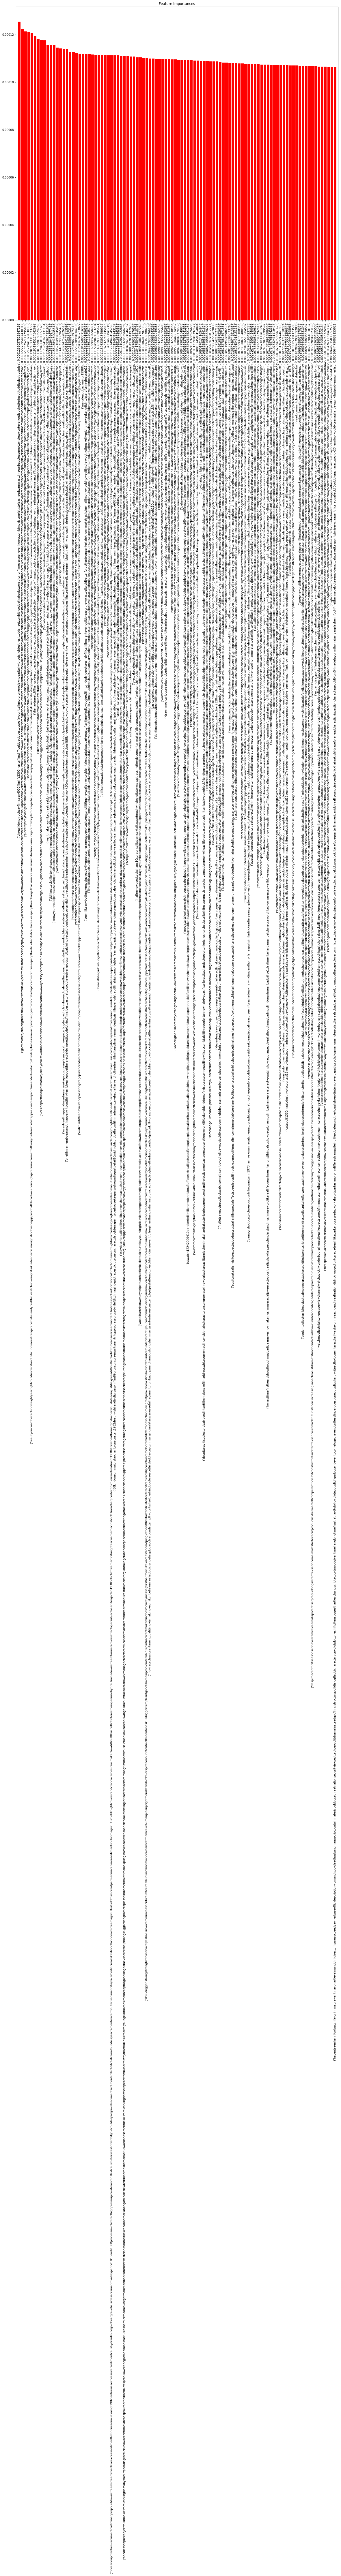

()

In [26]:
import operator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

def print_features(df):
    tree_clf = ExtraTreesClassifier()
    vec2 = CountVectorizer(analyzer=clean_text) 
    X_trains_2 = vec2.fit_transform(df['reviews'])
    le = LabelEncoder()
    y = le.fit_transform(df['labels'])
    
    tree_clf.fit(X_trains_2,y)
    
    importances = tree_clf.feature_importances_
    feature_names = vec2.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(),key=operator.itemgetter(1),reverse=True)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(20):
        print("Feature %d : %s (%f)" % (indices[f],sorted_features[f][0],sorted_features[f][1]))
    plt.figure(figsize = (20,20))
    plt.title("Feature Importances")
    plt.bar(range(100),importances[indices[:100]],color="r",align="center")
    plt.xticks(range(100),sorted_features[:100],rotation=90)
    plt.xlim([-1,100])
    plt.show()
    return()

print_features(df_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
Feature 11985 : lovetodayshowvarietisolecookwouldgreatstimulcaptivalwaykeepviewerpeekaroundcornerseecomenextearthpersongetlikeoneusmadeshowenjoyspecialguestfriendwellmadenicesurprislovefirstthemeaudiencinvitplayalongmustadmitshockseecometimelimitthinggolliillwriterecipsavetimekitchenmeantimefamilihaventtuneyetfindchanneltimeassurwontdisappoint (0.000199)
Feature 9064 : hilaricleanlightheartquoteworthielsaskfilmalltimnumberonefavoritmovieversinclittlgirlivedreamownbluevanflameobservbubblwordwisedidntwatchfilmlittlprobablwontwinplacehearttodayneverthelessgivechancmayfinddoesntmattersaydoesntmatteryouvgottaplay (0.000159)
Feature 14587 : nickelodeongonetoiletkidsaythinglikeohgodscrewshowpromothatepeoplarentgoodlookarentcrowdsaysexualpromiscualrightgirlslobbershirtlessboymentionoverweightboytakeshirtmaincharactbasicshunanyonordinaricarlifriendsammaylesbianbeatsnotanybodicrosspathsayalrightbchshowmuchnegnobodiwatchgive010 (0.000121)
Feature 19090 : seecthomahowelappearmanim

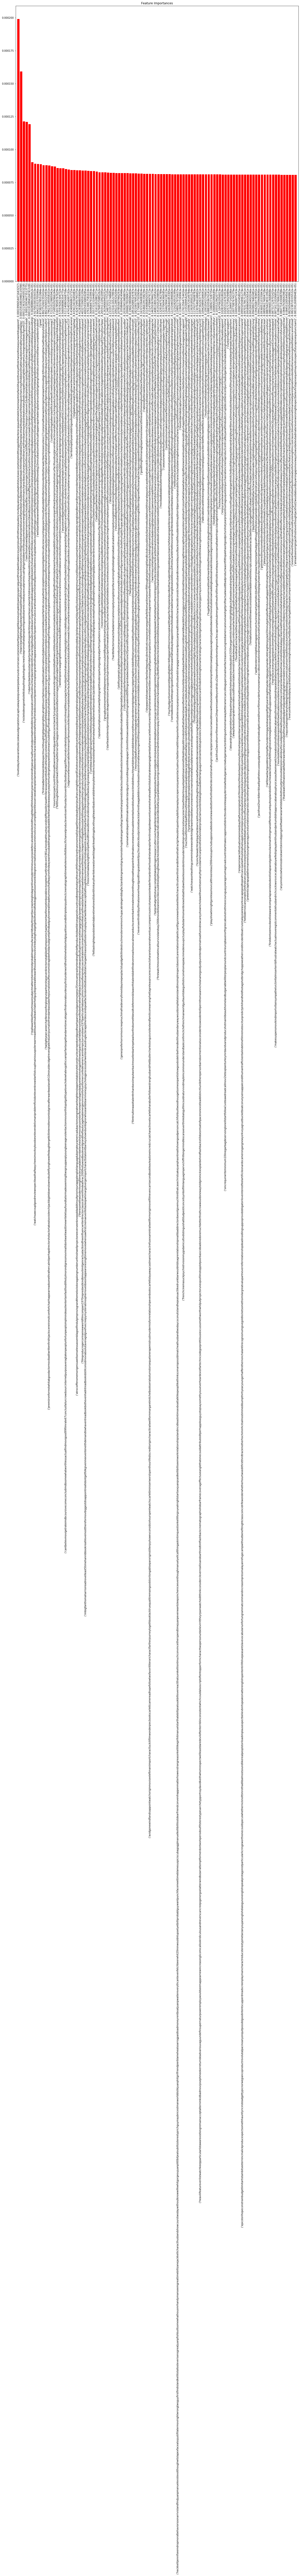

()

In [27]:
print_features(df_test)

###### Bonus Question

In [28]:
#bonus questions
import os
import glob

unsup=[]

#dirctory path for the unsup reviews
unsup_train_path = 'C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\data scienece using python\\week 16 - 17 - 18 - Capstone\\aclImdb\\train\\unsup'

#retriving the data
unsup_train_file = glob.glob(os.path.join(unsup_train_path,'*.txt'))

for f in unsup_train_file:
    with open(f,'r',encoding = 'utf-8') as unsup_train:
        unsup.append(unsup_train.read())

In [29]:
#loading the data
df_unsup=pd.DataFrame(unsup,columns=['reviews'])


In [30]:
df_unsup.shape

(50000, 1)

In [31]:
df_unsup.head(10)

reviews
0  I admit, the great majority of films released ...
1  Take a low budget, inexperienced actors doubli...
2  Everybody has seen 'Back To The Future,' right...
3  Doris Day was an icon of beauty in singing and...
4  After a series of silly, fun-loving movies, 19...
5  This isn't exactly a musical, but it almost se...
6  After seven years and seventeen pictures at Wa...
7  In the 1950's there were many film boigraphies...
8  MY RATING- 7.3<br /><br />This one is a curiou...
9  Doris Day and James Cagney are excellent in th...

In [32]:
df_unsup.to_csv('unsup.csv')

In [33]:
df_unsup=pd.read_csv('unsup.csv')

In [34]:
df_unsup['reviews'] = df_unsup['reviews'].apply(lambda x: re.sub(r"<.*>"," ",x))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=clean_text)
X = vectorizer.fit_transform(df_unsup.reviews)

In [36]:
# import modules
from sklearn.cluster import KMeans
# create an instance
kmeans = KMeans(n_clusters=2, random_state=0)
# fit the model
kmeans.fit(X)
# view the data labels after clustering
kmeans.labels_
# view the cluster centers
kmeans.cluster_centers_  #coordinate of centers


array([[7.54206518e-03, 3.95956192e-04, 6.06012519e-05, ...,
        5.35898246e-06, 0.00000000e+00, 4.93400343e-06],
       [5.49570718e-03, 9.71046881e-04, 5.48559265e-05, ...,
        0.00000000e+00, 1.44762875e-05, 0.00000000e+00]])

#### Phase 3 Visualization (Score 30 + 10 Extra credits):

    Each student must solve

        1. Create a word cloud with positive and negative words after cleansing
        2. Visualise the positive and negative words distribution (Hint: Histogram)
     
     Extra Credits

        1. Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)



In [37]:
from wordcloud import WordCloud

In [38]:
df_train2=pd.read_csv('train.csv')

In [39]:
df_train2=df_train2.drop('Unnamed: 0',axis=1)
df_train2.shape

(25000, 2)

In [40]:
df_train2['reviews'] = df_train2['reviews'].apply(lambda x: re.sub(r"<.*>"," ",x))

In [41]:
neg_list = df_train2[df_train2["labels"] == 0]["reviews"].unique().tolist()
neg_list[:2]
pos_list = df_train2[df_train2["labels"] == 1]["reviews"].unique().tolist()
pos_list[:2]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 "Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

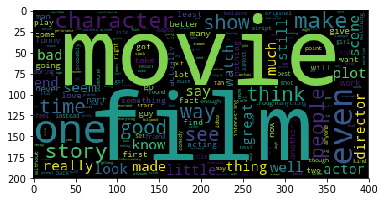

In [42]:
#negative word cloud
neg = " ".join(neg_list)
neg[:100]
neg_wordcloud = WordCloud().generate(neg)
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

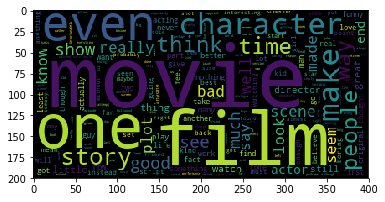

In [43]:
#positive word cloud
pos = " ".join(pos_list)
pos[:100]
pos_wordcloud = WordCloud().generate(neg)
plt.figure()
plt.imshow(pos_wordcloud)
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


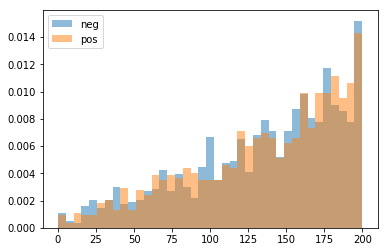

In [44]:
df_train2['body_len'] = df_train2['reviews'].apply(lambda x: len(x) - x.count(" "))
bins = np.linspace(0, 200, 40)

plt.hist(df_train2[df_train2['labels']==0]['body_len'], bins, alpha=0.5, normed=True, label='neg')
plt.hist(df_train2[df_train2['labels']==1]['body_len'], bins, alpha=0.5, normed=True, label='pos')
plt.legend(loc='upper left')
plt.show()

#### Phase 4 Hypothesis testing  and Feature Selection (Score 10):

    Each student must solve

        1. Create Hypothesis involving relationships between dependent and independent variables using parametric/non-parametric tests for various machine learning algorithms such as k-means clustering,  classification algorithms.



In [45]:
# import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer(analyzer=clean_text)

In [46]:
# convert text to vectors
X = count_vect.fit_transform(df_train['reviews'])

In [47]:
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df_train.labels)

In [48]:
#Naive Bayes
# import Nauve bayes classifier
from sklearn.naive_bayes import MultinomialNB
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((18750, 24885), (6250, 24885))

In [49]:
# fit the classifier model
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape


(6250,)

In [50]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.49776

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy


0.50672

In [52]:
from sklearn.svm import SVC
clf = SVC()
# fit the classifier
clf.fit(X_train, y_train)
# predict the outcome for testing data
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.49616

#### Phase 5 Model Building (Score 80 + 180 Extra credits):

     Each student must solve

        1. Supervised Learning: Build a sentiment analysis model to predict positive and negative classes (Score 40)
        2. Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews (Score 40)
     
     Extra Credits

        1.Supervised Learning: Compare the performance of different machine learning models, at least 2 (Score 40)
        2. Unsupervised Learning: Compare the performance of different models, at least 2 (Score 40)
        3. Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) (Score 50)
        4. Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. (Score 50)

In [53]:
# convert text to vectors
X_2 = count_vect.fit_transform(df_test['reviews'])

#label encoding
y_2 = le.fit_transform(df_test.labels)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=0)


In [54]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.49984

In [55]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict the outcome for testing data
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5

In [56]:
# import modules
from sklearn.cluster import KMeans
clust=2
# create an instance
kmeans = KMeans(n_clusters=clust, random_state=0)
# fit the model
kmeans.fit(X)
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(clust):
    print("Cluster %d:" % i),
    for vals in order_centroids[i, :10]:
        print(' %s' % terms[vals])

Top terms per cluster:
Cluster 0:
 
 citizen
 creativitynot
 cosmic
 backroom
 cheap
 chicklit
 diesthey
 ay
 cypru
Cluster 1:
 casei
 dori
 badger
 bader
 badera
 badest
 badeven
 badexcept
 badfor
 badfunni
